<a href="https://colab.research.google.com/github/houssemabdelwahed/Data_analysis_project/blob/main/MMM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('/content/MARKETING MIX MODELING YT - RAW DATA.csv')
df

,Time,sales,FB,TV,Radio,Date
0,Week 1,22,230.1,37.8,69.2,2020-01-01
1,Week 2,10,44.5,39.3,45.1,2020-01-02
2,Week 3,9,17.2,45.9,69.3,2020-01-03
3,Week 4,19,151.5,41.3,58.5,2020-01-04
4,Week 5,13,180.8,10.8,58.4,2020-01-05
5,Week 6,7,8.7,48.9,75.0,2020-01-06
6,Week 7,12,57.5,32.8,23.5,2020-01-07
7,Week 8,13,120.2,19.6,11.6,2020-01-08
8,Week 9,5,8.6,2.1,1.0,2020-01-09
9,Week 10,11,199.8,2.6,21.2,2020-01-10


In [9]:
df.drop('Date', 1, inplace=True)

<ipython-input-9-74b92bea5780>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Date', 1, inplace=True)


In [10]:
df

,Time,sales,FB,TV,Radio
0,Week 1,22,230.1,37.8,69.2
1,Week 2,10,44.5,39.3,45.1
2,Week 3,9,17.2,45.9,69.3
3,Week 4,19,151.5,41.3,58.5
4,Week 5,13,180.8,10.8,58.4
5,Week 6,7,8.7,48.9,75.0
6,Week 7,12,57.5,32.8,23.5
7,Week 8,13,120.2,19.6,11.6
8,Week 9,5,8.6,2.1,1.0
9,Week 10,11,199.8,2.6,21.2


In [11]:
fig = px.line(df, x= 'Time', y= df.columns)
fig.show()

In [12]:
corr=df.corr()
corr

<ipython-input-12-7d5195e2bf4d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,sales,FB,TV,Radio
sales,1.000000,0.798049,0.396754,0.139209
FB,0.798049,1.000000,-0.106758,-0.159078
TV,0.396754,-0.106758,1.000000,0.648448
Radio,0.139209,-0.159078,0.648448,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

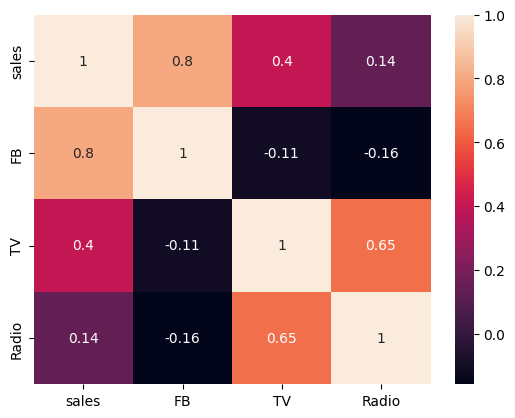

In [13]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)
plt.show


In [14]:
fig1 = px.scatter(df, x='FB', y='sales')
fig2 = px.scatter(df, x='TV', y='sales')
fig3 = px.scatter(df, x='Radio', y='sales')

fig1.show()
fig2.show()
fig3.show()

In [15]:
inputs = ['FB', 'TV']

X= df[inputs]
y= df['sales']
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     91.84
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           9.01e-13
Time:                        18:09:29   Log-Likelihood:                -58.729
No. Observations:                  30   AIC:                             123.5
Df Residuals:                      27   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1774      0.873      3.639      0.0

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)
print(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)



0.9061332635400242 0.38880609257466436


In [17]:
df.drop('Radio', 1, inplace=True)

<ipython-input-17-f23513cc39d9>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [20]:
df

,Time,sales,FB,TV
0,Week 1,22,230.1,37.8
1,Week 2,10,44.5,39.3
2,Week 3,9,17.2,45.9
3,Week 4,19,151.5,41.3
4,Week 5,13,180.8,10.8
5,Week 6,7,8.7,48.9
6,Week 7,12,57.5,32.8
7,Week 8,13,120.2,19.6
8,Week 9,5,8.6,2.1
9,Week 10,11,199.8,2.6


In [21]:
df['prediction']= model.predict(X)

In [22]:
df

,Time,sales,FB,TV,prediction
0,Week 1,22,230.1,37.8,20.547206
1,Week 2,10,44.5,39.3,11.241637
2,Week 3,9,17.2,45.9,10.868811
3,Week 4,19,151.5,41.3,17.053620
4,Week 5,13,180.8,10.8,13.798018
5,Week 6,7,8.7,48.9,10.900270
6,Week 7,12,57.5,32.8,10.895062
7,Week 8,13,120.2,19.6,12.057049
8,Week 9,5,8.6,2.1,3.588796
9,Week 10,11,199.8,2.6,13.494439


In [23]:

fig = px.line(df, x='Time', y=df.columns)
fig.show()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
train_data = df.iloc[:-3]
test_data = df.iloc[-3:]


In [26]:
p=1
d=1
q=1
model = ARIMA(train_data['prediction'], order=(p, d, q))

results = model.fit()


In [27]:
forecast_values = results.forecast(steps=3)


In [28]:


fig = px.line(train_data, x='Time', y='prediction', labels={'prediction': 'Training Data'}, line_shape='linear',
              title='Sales Forecast for the Next 3 Weeks')
fig.add_scatter(x=test_data['Time'], y=forecast_values, mode='lines', name='Forecasted Sales', line=dict(color='red'))

fig.update_layout(xaxis_title='Time', yaxis_title='Prediction', legend_title='Data Source', showlegend=True,)

fig.show()


In [29]:
df

,Time,sales,FB,TV,prediction
0,Week 1,22,230.1,37.8,20.547206
1,Week 2,10,44.5,39.3,11.241637
2,Week 3,9,17.2,45.9,10.868811
3,Week 4,19,151.5,41.3,17.053620
4,Week 5,13,180.8,10.8,13.798018
5,Week 6,7,8.7,48.9,10.900270
6,Week 7,12,57.5,32.8,10.895062
7,Week 8,13,120.2,19.6,12.057049
8,Week 9,5,8.6,2.1,3.588796
9,Week 10,11,199.8,2.6,13.494439


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = df[['FB', 'TV' ]]
y = df['sales']

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_model

In [36]:
y_pred_lr = lr_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)

In [38]:
import numpy as np


In [39]:
lr_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lr))
lr_r2 = r2_score(y_val, y_pred_lr)
rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rf_r2 = r2_score(y_val, y_pred_rf)

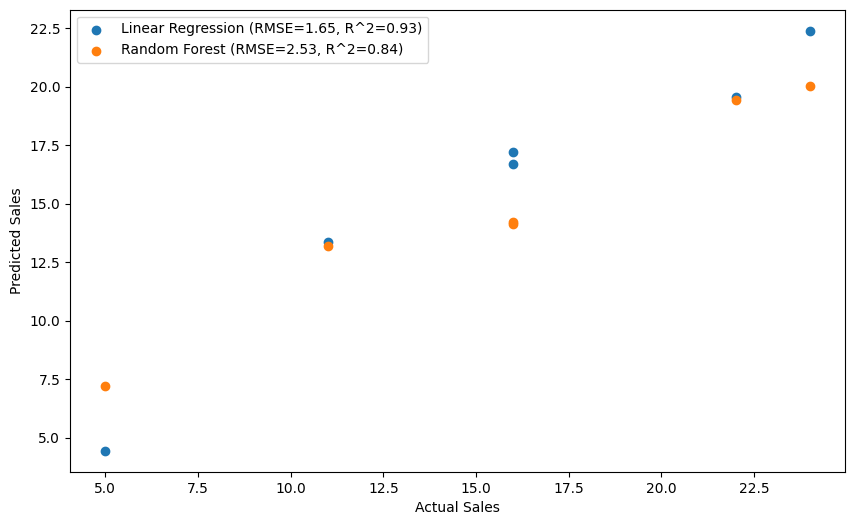

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_lr, label=f'Linear Regression (RMSE={lr_rmse:.2f}, R^2={lr_r2:.2f})')
plt.scatter(y_val, y_pred_rf, label=f'Random Forest (RMSE={rf_rmse:.2f}, R^2={rf_r2:.2f})')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()


